In [729]:
%matplotlib inline
import numpy as np
import pandas as pd
import requests
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import math
from os.path import exists
from IPython.display import display_html
sns.set()
pd.set_option('display.max_columns', None)

In [730]:
if not exists("df.csv"):
    with requests.get(
        "https://docs.google.com/spreadsheets/d/1wduqo5WyYmCpaGnE81sLNGU0VSodIekMfpmEwU0fGqs/export?format=csv"
    ) as r, open("df.csv", "wb") as f:
        for chunk in r.iter_content():
            f.write(chunk)

df_features = pd.read_csv("df.csv", low_memory = False)
df_features.head()

,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,id,llovieron_hamburguesas_hoy,mm_evaporados_agua,mm_lluvia_dia,nubosidad_tarde,nubosidad_temprano,presion_atmosferica_tarde,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viendo_tarde,velocidad_viendo_temprano
0,Retiro,2016-10-11,Este,Nornoreste,10.7,59.0,56.0,86942,no,16.0,0.0,3.0,1.0,1009.9,1010.2,Estesureste,33.0,29.2,16.8,24.1,25.3,19.0,4.0
1,Vélez Sársfield,2016-03-28,Sur,suroeste,0.0,49.0,83.0,102098,no,2.6,0.0,8.0,7.0,1020.4,1021.4,Sur,31.0,16.9,10.6,16.4,12.3,13.0,7.0
2,Palermo,2017-05-11,Sursureste,Norte,4.3,59.0,83.0,67154,no,2.4,0.0,7.0,7.0,1024.8,1026.5,Norte,26.0,16.6,4.4,15.7,9.4,9.0,13.0
3,Mataderos,2012-05-07,suroeste,Sur,NaN,67.0,93.0,50245,no,NaN,0.0,NaN,NaN,1017.0,1020.0,Oestesuroeste,13.0,11.4,0.8,11.1,4.0,6.0,6.0
4,Recoleta,2014-06-19,Nornoreste,Nornoreste,0.8,94.0,97.0,82904,no,0.8,0.0,NaN,NaN,1016.1,1021.9,Nornoreste,33.0,11.6,6.7,11.2,8.8,11.0,15.0


In [731]:
if not exists("df_resultados.csv"):
    with requests.get(
        "https://docs.google.com/spreadsheets/d/1gvZ03uAL6THwd04Y98GtIj6SeAHiKyQY5UisuuyFSUs/export?format=csv"
    ) as r, open("df_resultados.csv", "wb") as f:
        for chunk in r.iter_content():
            f.write(chunk)

df_target = pd.read_csv("df_resultados.csv", low_memory=False)
df_target.head()

,id,llovieron_hamburguesas_al_dia_siguiente
0,86942,no
1,102098,no
2,67154,no
3,50245,no
4,82904,no


In [732]:
df = df_features.merge(df_target, on = 'id') #Justificar?
df.set_index("id", inplace=True)
#Corrige typo
df.rename(columns={"velocidad_viendo_tarde": "velocidad_viento_tarde",
          "velocidad_viendo_temprano": "velocidad_viento_temprano"}, inplace=True)
df_original = df.copy()

## ¿Cómo son las columnas del dataset?

In [733]:
display(df.head())
df.dtypes.to_frame("Tipo de dato")

,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,llovieron_hamburguesas_hoy,mm_evaporados_agua,mm_lluvia_dia,nubosidad_tarde,nubosidad_temprano,presion_atmosferica_tarde,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viento_tarde,velocidad_viento_temprano,llovieron_hamburguesas_al_dia_siguiente
id,,,,,,,,,,,,,,,,,,,,,,,
86942,Retiro,2016-10-11,Este,Nornoreste,10.7,59.0,56.0,no,16.0,0.0,3.0,1.0,1009.9,1010.2,Estesureste,33.0,29.2,16.8,24.1,25.3,19.0,4.0,no
102098,Vélez Sársfield,2016-03-28,Sur,suroeste,0.0,49.0,83.0,no,2.6,0.0,8.0,7.0,1020.4,1021.4,Sur,31.0,16.9,10.6,16.4,12.3,13.0,7.0,no
67154,Palermo,2017-05-11,Sursureste,Norte,4.3,59.0,83.0,no,2.4,0.0,7.0,7.0,1024.8,1026.5,Norte,26.0,16.6,4.4,15.7,9.4,9.0,13.0,no
50245,Mataderos,2012-05-07,suroeste,Sur,NaN,67.0,93.0,no,NaN,0.0,NaN,NaN,1017.0,1020.0,Oestesuroeste,13.0,11.4,0.8,11.1,4.0,6.0,6.0,no
82904,Recoleta,2014-06-19,Nornoreste,Nornoreste,0.8,94.0,97.0,no,0.8,0.0,NaN,NaN,1016.1,1021.9,Nornoreste,33.0,11.6,6.7,11.2,8.8,11.0,15.0,no


,Tipo de dato
barrio,object
dia,object
direccion_viento_tarde,object
direccion_viento_temprano,object
horas_de_sol,float64
humedad_tarde,float64
humedad_temprano,float64
llovieron_hamburguesas_hoy,object
mm_evaporados_agua,float64
mm_lluvia_dia,float64


Podemos ver que la feature presion_atmosferica_tarde esta con tipo de dato extraño, cuando en realidad debería ser un número.
También las columnas de llovieron_hamburguesas_hoy y llovieron_hamburguesas_al_dia_siguiente son strings. Nos parece más convenientes que sean simplemente números donde 'no' es 0 y 'si' es 1.

In [734]:
df.replace({'llovieron_hamburguesas_hoy': {"si": 1, "no": 0},
           'llovieron_hamburguesas_al_dia_siguiente': {"si": 1, "no": 0 }},
           inplace = True)
df.llovieron_hamburguesas_al_dia_siguiente.astype(np.float64, copy=False)
df.llovieron_hamburguesas_hoy.astype(np.float64, copy=False)
df.head()

,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,llovieron_hamburguesas_hoy,mm_evaporados_agua,mm_lluvia_dia,nubosidad_tarde,nubosidad_temprano,presion_atmosferica_tarde,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viento_tarde,velocidad_viento_temprano,llovieron_hamburguesas_al_dia_siguiente
id,,,,,,,,,,,,,,,,,,,,,,,
86942,Retiro,2016-10-11,Este,Nornoreste,10.7,59.0,56.0,0.0,16.0,0.0,3.0,1.0,1009.9,1010.2,Estesureste,33.0,29.2,16.8,24.1,25.3,19.0,4.0,0.0
102098,Vélez Sársfield,2016-03-28,Sur,suroeste,0.0,49.0,83.0,0.0,2.6,0.0,8.0,7.0,1020.4,1021.4,Sur,31.0,16.9,10.6,16.4,12.3,13.0,7.0,0.0
67154,Palermo,2017-05-11,Sursureste,Norte,4.3,59.0,83.0,0.0,2.4,0.0,7.0,7.0,1024.8,1026.5,Norte,26.0,16.6,4.4,15.7,9.4,9.0,13.0,0.0
50245,Mataderos,2012-05-07,suroeste,Sur,NaN,67.0,93.0,0.0,NaN,0.0,NaN,NaN,1017.0,1020.0,Oestesuroeste,13.0,11.4,0.8,11.1,4.0,6.0,6.0,0.0
82904,Recoleta,2014-06-19,Nornoreste,Nornoreste,0.8,94.0,97.0,0.0,0.8,0.0,NaN,NaN,1016.1,1021.9,Nornoreste,33.0,11.6,6.7,11.2,8.8,11.0,15.0,0.0


In [735]:
try:
    df.astype({'presion_atmosferica_tarde' : np.float64})
except Exception as e:
    print(str(e))

could not convert string to float: '1.009.555'


En *presion_atmosferica_tarde* falla al transformarse a número por que hay un valor con 2 puntos. Vamos a ver cuantos más hay:

In [736]:
df = df.astype({'presion_atmosferica_tarde' : str})
indices_con_error = []
for index, row in df.iterrows():
    try:
        float(row['presion_atmosferica_tarde'])
    except:
        indices_con_error.append(index)
        print(f"Fila {index} con dato {row['presion_atmosferica_tarde']} no puede ser convertida a float")

Fila 30388 con dato 1.009.555 no puede ser convertida a float
Fila 30418 con dato 10.167.769.999.999.900 no puede ser convertida a float


Como son solo 2, suponemos que simplemente el error produjo al cargar los datos. Decidimos dropear las filas ya que contienen información incorrecta

In [737]:
for index in indices_con_error:
    df.drop(index, inplace=True, errors="ignore")

df['presion_atmosferica_tarde'] = df['presion_atmosferica_tarde'].astype(np.float64)

Cambiamos el tipo de las variables categóricas

In [738]:
df = df.astype({
    "barrio": "category",
    "direccion_viento_tarde": "category",
    "direccion_viento_temprano": "category",
    "rafaga_viento_max_direccion": "category"
})

Convertimos la columna dia a datetime

In [739]:
df.dia = pd.to_datetime(df.dia)

In [740]:
df.dtypes.to_frame("Tipo de dato")

,Tipo de dato
barrio,category
dia,datetime64[ns]
direccion_viento_tarde,category
direccion_viento_temprano,category
horas_de_sol,float64
humedad_tarde,float64
humedad_temprano,float64
llovieron_hamburguesas_hoy,float64
mm_evaporados_agua,float64
mm_lluvia_dia,float64


In [741]:
variables_numericas = df.select_dtypes(include=['float64']).columns.drop("llovieron_hamburguesas_al_dia_siguiente")
variable_target = "llovieron_hamburguesas_al_dia_siguiente"
variables_categoricas = df.select_dtypes(include=["category"]).columns
variable_fecha = df.select_dtypes(include=["datetime64[ns]"]).columns

Luego de este análisis, podemos observar que el dataset está compuesto de 17 variables numéricas (incluyendo llovieron_hamburguesas_hoy, que antes era booleana), 4 categóricas y 1 de fecha. Además, contamos con la variable target

## ¿Cuántos valores distintos puede tomar cada feature?

In [742]:
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [743]:
valores_unicos = df.nunique(dropna=False).sort_values(ascending=False).to_frame("Valores distintos")
display_side_by_side(valores_unicos.iloc[:8],
                    valores_unicos.iloc[8:16],
                    valores_unicos.iloc[16:])

,Valores distintos
dia,3405
mm_lluvia_dia,636
presion_atmosferica_temprano,543
presion_atmosferica_tarde,541
temp_max,502
temperatura_tarde,498
temperatura_temprano,438
temp_min,386
,Valores distintos
mm_evaporados_agua,335


Podemos observar que las variables nubosidad_temprano y nubosidad_tarde tienen solo 11 valores distintos, por lo que podemos considerarlas variables discretas, mientras que el resto tiene una cardinalidad suficientemente alta como para considerarlas continuas (lo cual resultará importante a la hora de visualizar la información). Las variables llovieron_hamburguesas_hoy y llovieron_hamburguesas_al_dia_siguiente son booleanas, como ya se vio anteriormente, pero tienen 3 valores distintos. Esto se debe a que también se contaron los NaN.

In [744]:
variables_continuas = df[variables_numericas].nunique().sort_values(ascending=False).index[:-4]
variables_discretas = ["nubosidad_temprano", "nubosidad_tarde"]

Por otro lado, resulta llamativo que la cantidad de valores distintos de nubosidad_temprano y nubosidad_tarde sea 11 ya que, según el enunciado, la variable toma valores entre 0 y 8.

In [745]:
print(f"nubosidad_temprano: \t{list(df.nubosidad_temprano.unique())}")
print(f"nubosidad_tarde: \t{list(df.nubosidad_tarde.unique())}")

nubosidad_temprano: 	[1.0, 7.0, nan, 8.0, 3.0, 0.0, 2.0, 5.0, 6.0, 4.0, 9.0]
nubosidad_tarde: 	[3.0, 8.0, 7.0, nan, 5.0, 0.0, 1.0, 4.0, 2.0, 6.0, 9.0]


Por un lado vemos que tenemos missings, pero también datos incorrectos (9).

In [746]:
display(df[df.nubosidad_temprano == 9])
display(df[df.nubosidad_tarde == 9])

,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,llovieron_hamburguesas_hoy,mm_evaporados_agua,mm_lluvia_dia,nubosidad_tarde,nubosidad_temprano,presion_atmosferica_tarde,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viento_tarde,velocidad_viento_temprano,llovieron_hamburguesas_al_dia_siguiente
id,,,,,,,,,,,,,,,,,,,,,,,
47226,Liniers,2012-05-27,Sursuroeste,Nornoreste,7.8,41.0,99.0,0.0,NaN,0.0,NaN,9.0,1020.7,1022.4,suroeste,30.0,14.5,0.6,14.2,4.4,9.0,4.0,0.0
30776,Constitución,2009-09-23,Oeste,Oeste,8.0,36.0,40.0,1.0,11.2,4.4,3.0,9.0,997.8,996.8,NaN,NaN,21.8,17.0,20.9,17.3,37.0,30.0,0.0


,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,llovieron_hamburguesas_hoy,mm_evaporados_agua,mm_lluvia_dia,nubosidad_tarde,nubosidad_temprano,presion_atmosferica_tarde,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viento_tarde,velocidad_viento_temprano,llovieron_hamburguesas_al_dia_siguiente
id,,,,,,,,,,,,,,,,,,,,,,,
106933,Villa Crespo,2012-11-02,Estesureste,Sureste,11.4,13.0,45.0,0.0,11.6,0.2,9.0,6.0,1015.2,1019.0,Sursureste,39.0,24.6,10.6,23.7,14.8,17.0,26.0,0.0


Se trata de 3 muestras con datos mal cargados, por lo tanto podemos dropearlas

In [747]:
df.drop(labels=df[df.nubosidad_temprano == 9].index, inplace=True)
df.drop(labels=df[df.nubosidad_tarde == 9].index, inplace=True)

Otro detalle que llama la atención, es que hay 49 valores distintos para barrio, cuando en realidad solo hay 48 barrios porteños

In [748]:
barrio_counts = df.barrio.value_counts().to_frame().sort_index()

display_side_by_side(barrio_counts.iloc[:10],
                     barrio_counts.iloc[10:20],
                     barrio_counts.iloc[20:30],
                     barrio_counts.iloc[30:40],
                     barrio_counts.iloc[40:])

,barrio
Agronomía,2403
Almagro,2398
Balvanera,2421
Barracas,2430
Belgrano,2393
Boedo,2426
Caballito,2384
Chacarita,2386
Coghlan,2444
Colegiales,2417


Vemos que se encuentra separado "Palerlo" y "Palermo cheto". Quizá sea buena idea combinar ambas instancias en una sola

In [749]:
df.replace({"Palermo cheto": "Palermo"}, inplace=True)

Al analizar estos datos, se observó que hay datos faltantes (missings), lo que generó la siguiente pregunta:

In [750]:
df.reset_index

<bound method DataFrame.reset_index of                      barrio        dia direccion_viento_tarde  \
id                                                              
86942                Retiro 2016-10-11                   Este   
102098      Vélez Sársfield 2016-03-28                    Sur   
67154               Palermo 2017-05-11             Sursureste   
50245             Mataderos 2012-05-07               suroeste   
82904              Recoleta 2014-06-19             Nornoreste   
...                     ...        ...                    ...   
118424         Villa Lugano 2011-03-07          Oestesuroeste   
87436              Saavedra 2009-07-25                Sureste   
116306  Villa General Mitre 2013-11-11               suroeste   
112204         Villa Devoto 2010-08-17            Sursuroeste   
34196                Flores 2010-11-08                Noreste   

       direccion_viento_temprano  horas_de_sol  humedad_tarde  \
id                                                

## ¿Cómo se distribuyen los datos faltantes?

Vemos como están representados los datos faltantes

In [751]:
print(f"'-':\t{df.astype('str').eq('-').any(None)}")
print(f"' ':\t{df.astype('str').eq(' ').any(None)}")
print(f"NaN:\t{df.astype('str').eq('nan').any(None)}")

'-':	False
' ':	False
NaN:	True


Podemos ver que aparecen como NaN. Graficamos el porcentaje de datos faltantes por feature

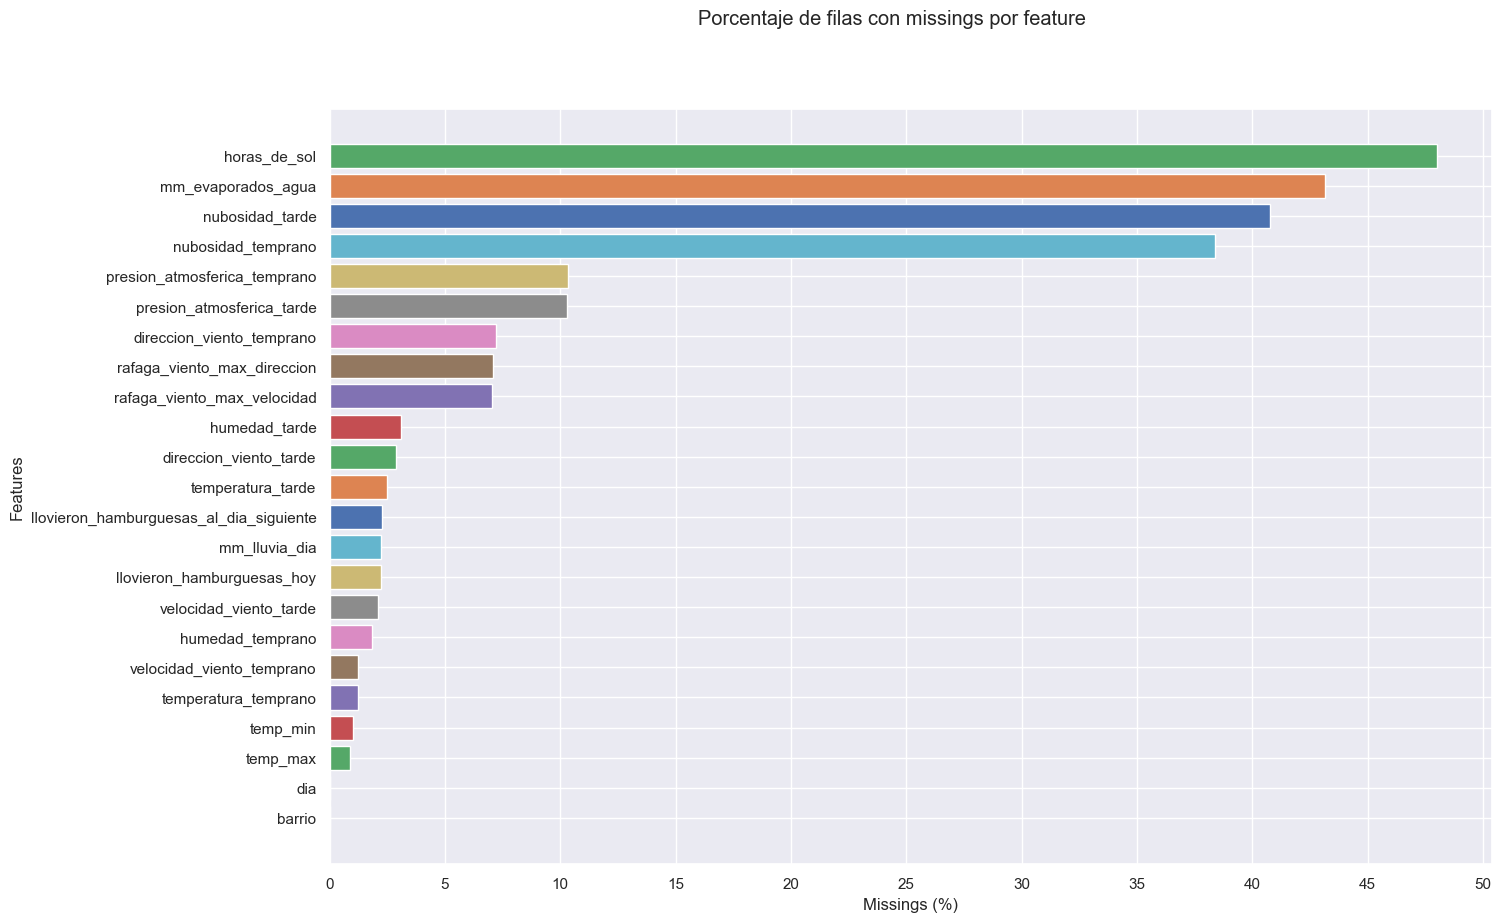

In [752]:
def plot_missings(dataframe):
    fig, ax = plt.subplots(figsize=(15,10))
    ax.set_xlabel("Missings (%)")
    ax.set_ylabel("Features")
    ax.set_xticks(range(0, 61, 5))
    fig.suptitle("Porcentaje de filas con missings por feature")
    fig.set_dpi(100)

    features_ord = sorted(dataframe.columns, key=lambda f : len(dataframe[dataframe[f].isna()]))
    for feature in features_ord:
        cant_missings = dataframe[feature].isna().mean() * 100
        ax.barh(feature, cant_missings)

plot_missings(df)

El gráfico representa el porcentaje de filas con datos faltantes por columna.
Podemos ver en el gráfico que en las columnas de día y barrio no hay ningún dato faltante. La mayoría de estos se encuentran en las columnas de *horas_de_sol*, *mm_evaporados_agua*, *nubosidad_tarde* y *nubosidad_temprano*
Resulta interesante observar que, para el caso de features asociadas a una misma variable climática, el porcentaje de missings es similar. Por ejemplo, el caso de presion_atmosferica_tarde y presion_atmosferica_temprano.
Surge la posibilidad de que los missings en dichas variables estén relacionados.

## ¿Cómo se relacionan los datos faltantes?

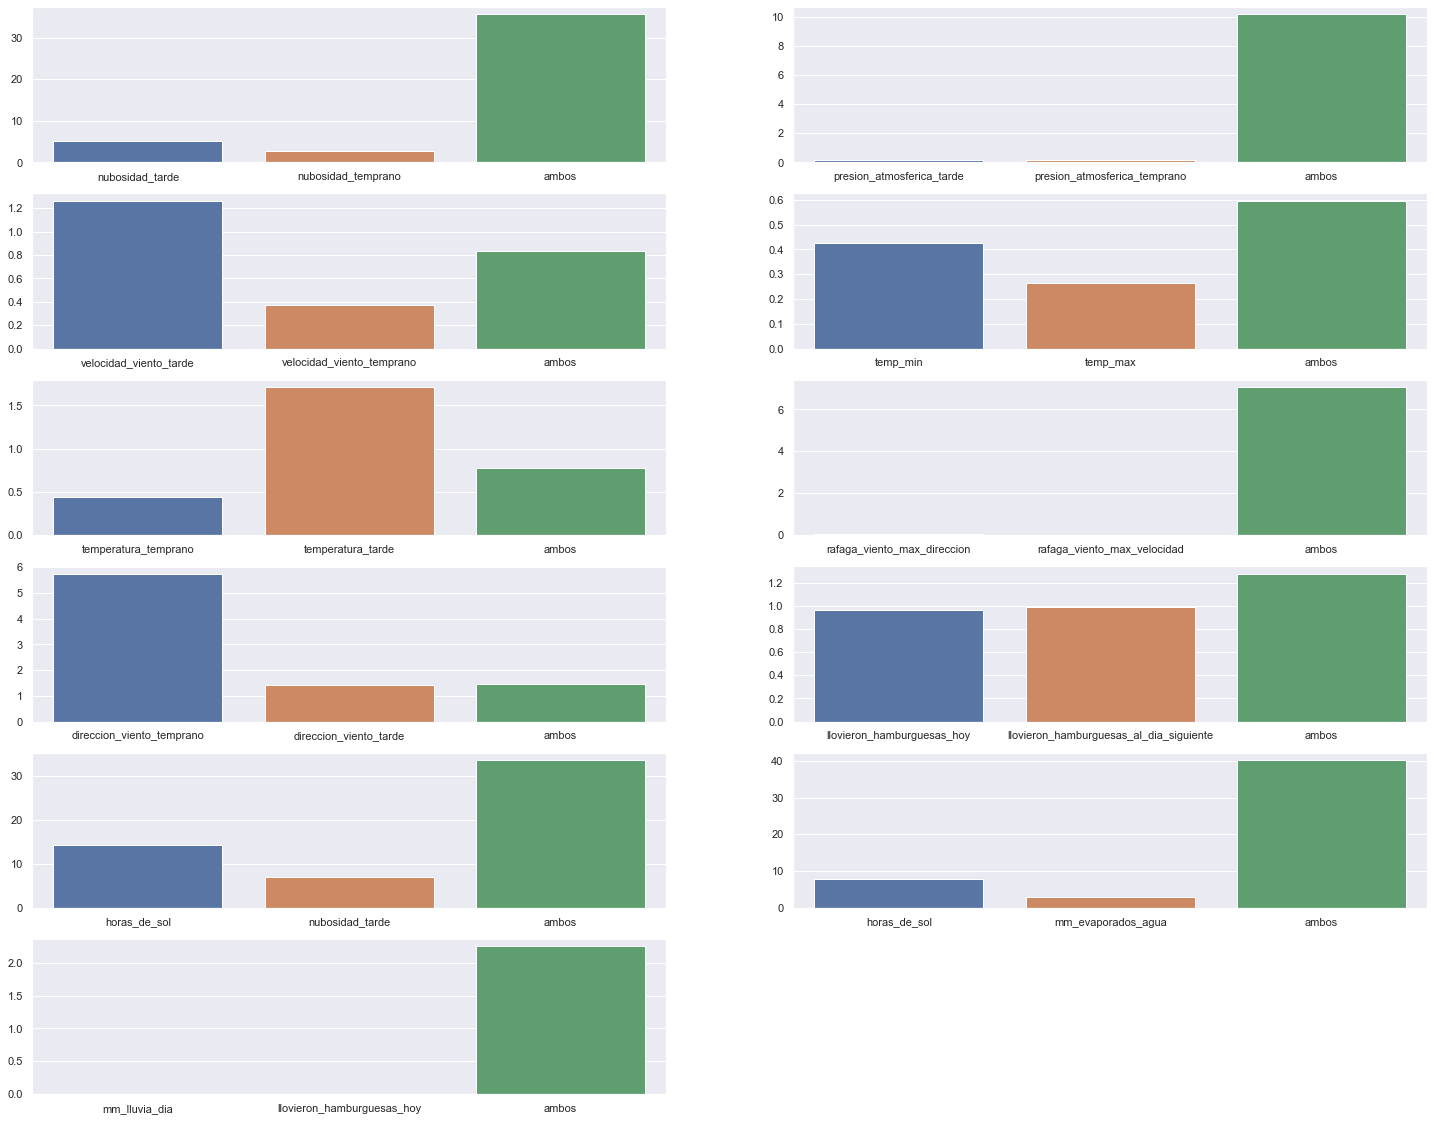

In [753]:
def mostrar_relacion_faltantes(ax, feature1, feature2):
    faltan_en_uno = df[feature1].isna().mean() * 100
    faltan_en_otro = df[feature2].isna().mean() * 100
    faltan_en_ambos = (df[feature1].isna() & df[feature2].isna()).mean() * 100
    y = [faltan_en_uno - faltan_en_ambos, faltan_en_otro - faltan_en_ambos, faltan_en_ambos]
    x = [feature1, feature2, "ambos"]
    sns.barplot(
        ax=ax,
        x=x,
        y=y,
    )

pares_features = [("nubosidad_tarde", "nubosidad_temprano"),
                  ("presion_atmosferica_tarde", "presion_atmosferica_temprano"),
                  ("velocidad_viento_tarde", "velocidad_viento_temprano"),
                  ("temp_min", "temp_max"),
                  ("temperatura_temprano", "temperatura_tarde"),
                  ("rafaga_viento_max_direccion", "rafaga_viento_max_velocidad"),
                  ("direccion_viento_temprano", "direccion_viento_tarde"),
                  ("llovieron_hamburguesas_hoy", "llovieron_hamburguesas_al_dia_siguiente"),
                  ("horas_de_sol", "nubosidad_tarde"),
                  ("horas_de_sol", "mm_evaporados_agua"),
                  ("mm_lluvia_dia", "llovieron_hamburguesas_hoy")
                 ]

fig, axs = plt.subplots((len(pares_features) + 1)//2,2, figsize=(25,20))

for ax,par_feature in zip(axs.flat, pares_features):
    mostrar_relacion_faltantes(ax, par_feature[0], par_feature[1])
    #ax.set_ylabel("Porcentaje de missings (%)")
    #ax.set_xlabel("Features")

for ax in axs.flat[len(pares_features):]:
    ax.axis("off")
plt.show()

Para los pares nubosidad, presion_atmosferica y rafaga_viento, casi en todos los casos en los que falta uno de los datos, también falta el otro. Esto es un caso de Missing At Random. Algo similar, aunque en menor proporción, ocurre con horas_de_sol, nubosidad_tarde y mm_evaporados_agua. Para el resto de los casos, no hay evidencia clara de que ocurra.
Por otro lado, vemos que hay muchos más missings en direccion_viento_temprano que en direccion_viento_tarde, y lo mismo para temperatura_tarde y temperatura_temprano. Esto despierta la sospecha de que, quizá, algunos missings están relacionados con el valor de la variable target. Para poder comprobar esta posibilidad, primero debemos saber como se distribuyen los valores de esta variable

## ¿Cómo se distribuyen los valores de la variable target?

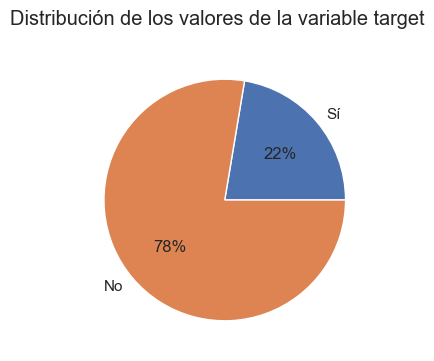

In [754]:
distribucion_target = df.llovieron_hamburguesas_al_dia_siguiente.value_counts(normalize=True)
llovio_al_dia_siguiente = distribucion_target.loc[1]
no_llovio_al_dia_siguiente = distribucion_target.loc[0]

fig, ax = plt.subplots(dpi=100)
fig.suptitle("Distribución de los valores de la variable target")
ax.pie(
    [llovio_al_dia_siguiente, no_llovio_al_dia_siguiente],
    labels=["Sí", "No"],
    autopct='%1.0f%%',
)
plt.show()

Los valores no esán distribuidos de manera uniforme, sino que en la mayoría de los casos no llovió al día siguiente. De gráficos anteriores, también sabemos que el porcentaje de missings es bastante bajo. Esta información será útil al momento de evaluar la accuracy de la baseline: si es menor a 78%, será una mala baseline, ya que una función que devuelva "no" de manera incondicional, la superaría.
Retornamos a la pregunta de la cual surgió este análisis

## ¿Los missings están relacionados con el valor de la variable target?

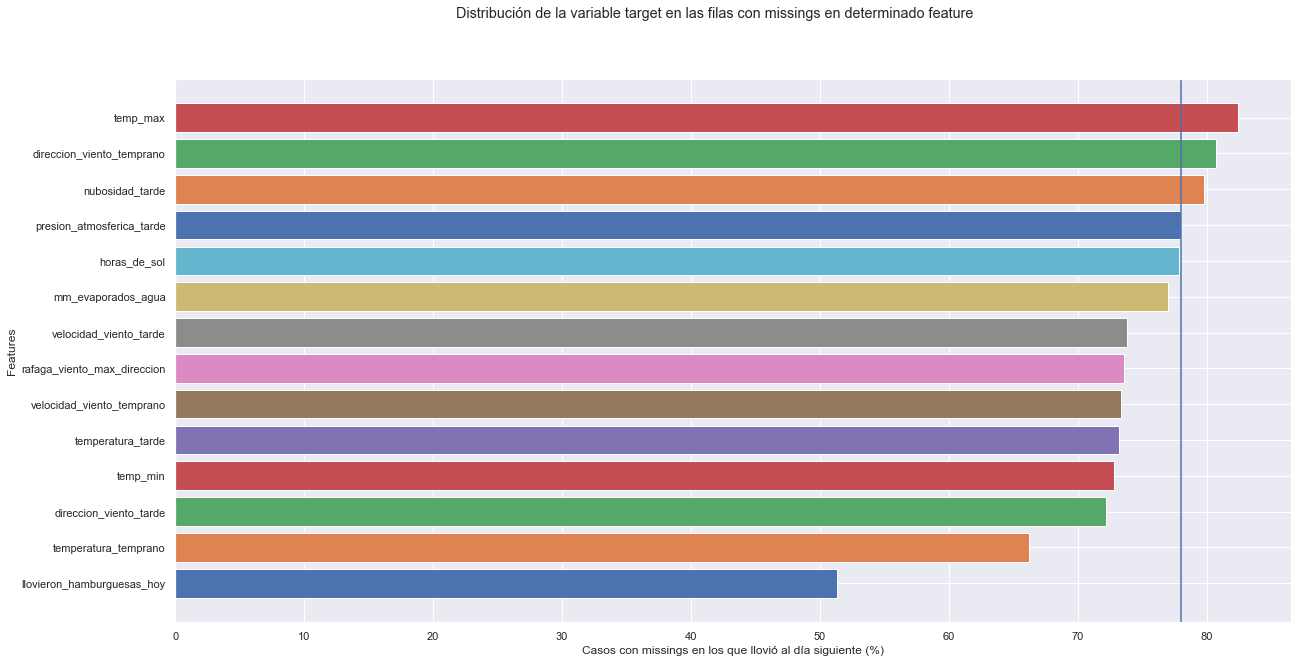

In [755]:
def graficar_relacion_missings_target(ax, feature):
    distribucion_target_en_missings = df[df[feature].isna()].llovieron_hamburguesas_al_dia_siguiente.value_counts(normalize=True)
    x=[feature]
    y=[distribucion_target_en_missings.loc[0] * 100]
    ax.barh(x, y)

features_missings = [
    "nubosidad_tarde",
    "presion_atmosferica_tarde",
    "velocidad_viento_tarde",
    "velocidad_viento_temprano",
    "temp_min",
    "temp_max",
    "temperatura_temprano",
    "temperatura_tarde",
    "rafaga_viento_max_direccion",
    "direccion_viento_temprano",
    "direccion_viento_tarde",
    "llovieron_hamburguesas_hoy",
    "horas_de_sol",
    "mm_evaporados_agua"
]
features_missings.sort(key=lambda feature: df[df[feature].isna()].llovieron_hamburguesas_al_dia_siguiente.value_counts(normalize=True).loc[0])
fig, ax = plt.subplots(figsize=(20,10))
ax.axvline(78)
ax.set_ylabel("Features")
ax.set_xlabel("Casos con missings en los que llovió al día siguiente (%)")
fig.suptitle("Distribución de la variable target en las filas con missings en determinado feature")
for feature in features_missings:
    graficar_relacion_missings_target(ax, feature)

La linea vertical en 78% indica el valor "normal" que debería tener la feature, tal y como se analizó anteriormente. Vemos que la mayoría de features no presenta una relación evidente entre los missings y el valor de la variable target. El único valor sobresaliente es el de llovieron_hamburguesas_hoy en el cual, a primera vista, pareciera estar relacionado. Pero, como se vio anteriormente, dicha variable tiene un porcentaje de missings muy bajo, por lo cual es muy probable de que se trate de una coincidencia azarosa.

## ¿Cómo de distribuyen los valores de las variables?

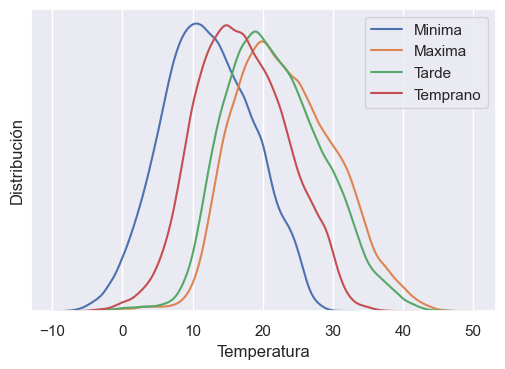

In [756]:
plt.figure(dpi=100)
plt.xlabel("Temperatura")
plt.ylabel("Distribución")
plt.yticks([])
sns.kdeplot(df.temp_min, label="Minima")
sns.kdeplot(df.temp_max, label="Maxima")
sns.kdeplot(df.temperatura_tarde, label="Tarde")
sns.kdeplot(df.temperatura_temprano, label="Temprano")
plt.legend()
plt.show()

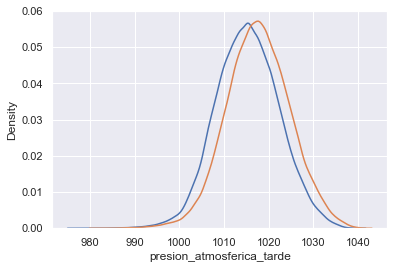

In [757]:
sns.kdeplot(df.presion_atmosferica_tarde)
sns.kdeplot(df.presion_atmosferica_temprano)
plt.show()

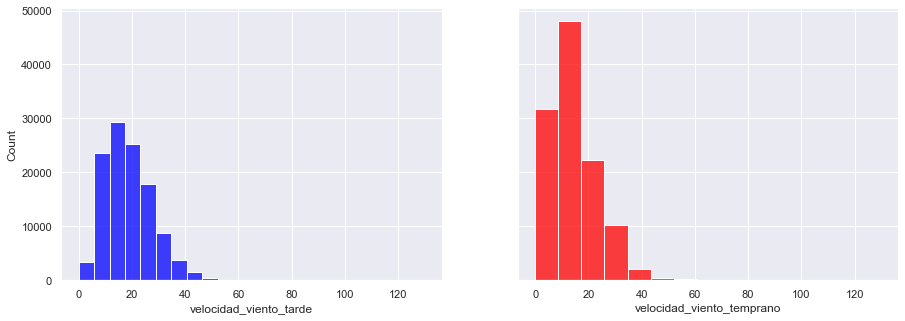

In [758]:
fig, axs = plt.subplots(1,2,figsize=(15,5), sharex=True, sharey=True)

sns.histplot(df.velocidad_viento_tarde, bins=15, color="blue",ax=axs[0])
sns.histplot(df.velocidad_viento_temprano, bins=15, color="red",ax=axs[1])
plt.show()

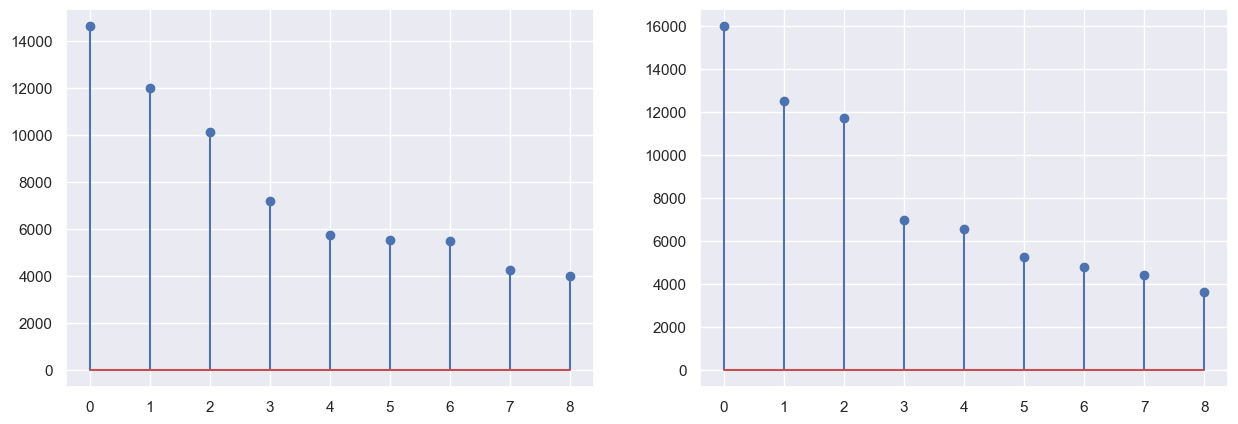

In [759]:
fig, axs = plt.subplots(1,2,dpi=100, figsize=(15,5))

axs[0].stem(df.nubosidad_tarde.value_counts())
axs[1].stem(df.nubosidad_temprano.value_counts())
plt.show()

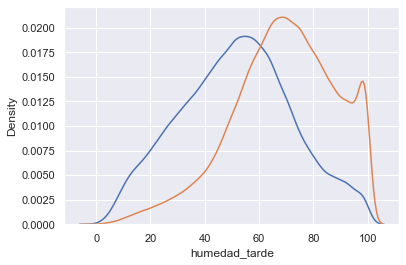

In [760]:
sns.kdeplot(df.humedad_tarde)
sns.kdeplot(df.humedad_temprano)
plt.show()

<AxesSubplot:xlabel='mm_evaporados_agua', ylabel='Density'>

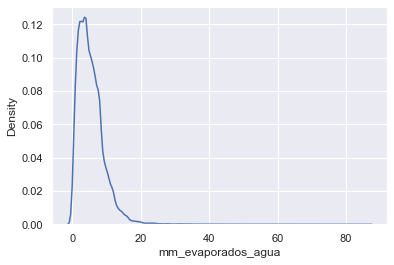

In [761]:
sns.kdeplot(df.mm_evaporados_agua)

<AxesSubplot:xlabel='horas_de_sol', ylabel='Count'>

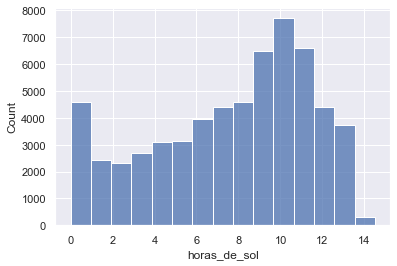

In [762]:
sns.histplot(df.horas_de_sol, bins=15)

<AxesSubplot:xlabel='mm_lluvia_dia', ylabel='Density'>

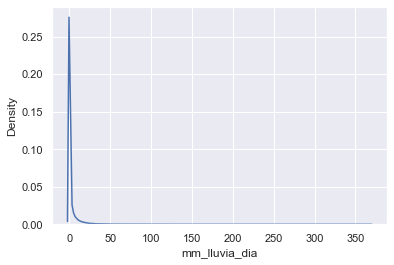

In [763]:
sns.kdeplot(df.mm_lluvia_dia)

In [764]:
# SEGUIR ANALISIS

## ¿Cómo está relacionada la variable mm_lluvia_dia con llovieron_hamburguesas_hoy?

In [765]:
df[(df.mm_lluvia_dia <= 1) & (df.llovieron_hamburguesas_hoy == 0)].llovieron_hamburguesas_hoy.value_counts()

0.0    88356
Name: llovieron_hamburguesas_hoy, dtype: int64

In [ ]:
df[(df.mm_lluvia_dia > 1) & (df.llovieron_hamburguesas_hoy == 1)].llovieron_hamburguesas_hoy.value_counts()

La columna llovieron_hamburguesas_hoy es completamente dependiente de mm_lluvia_dia, entonces podemos dropearla sin pérdida de información

In [ ]:
df.drop(columns=["llovieron_hamburguesas_hoy"], inplace=True)

## ¿Qué pares de variables tienen mayor covarianza? ¿Es posible combinar features?

In [ ]:
pares_ord_cov = df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()
pares_ord_cov = pares_ord_cov[pares_ord_cov < 1]
display(pares_ord_cov.to_frame("|Covarianza|").head(7))

Las variables de temperatura parecen estar bastante relacionadas entre sí, en especial temperatura_tarde y temp_max. También presion_atmosferica_tarde y presion_atmosferica_temprano. Para observar estas relaciones, podemos graficar los respectivos scatterplots. Podemos aprovechar el gráfico, además, para analizar posibles relaciones con la variable target

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(20,20))
fig.set_dpi(75)
for cov, ax in zip(pares_ord_cov.index[:7], axs.flat):
    ax.set_title(f"|Covarianza| {pares_ord_cov[cov]:.3f}")
    g= sns.scatterplot(
        x=cov[0],
        y=cov[1],
        hue="llovieron_hamburguesas_al_dia_siguiente",
        palette="tab10",
        data=df.sample(25000, random_state=0).replace({variable_target: {1: "Sí", 0: "No"}}),
        ax=ax,
    )
    ax.legend(title="Target")
axs.flat[-1].axis("off")
plt.show()

In [ ]:
grupo = df.groupby("dia").agg("mean").reset_index()
fig, ax = plt.subplots(dpi=100, figsize=(20,5))

ax.set_ylabel("Temperatura")
ax.set_xlabel("Fechas")
sns.scatterplot(x="dia", y="temp_min", data=grupo, label="Minima", alpha=0.7)
sns.scatterplot(x="dia", y="temp_max", data=grupo, label="Maxima", alpha=0.7)
sns.scatterplot(x="dia", y="temperatura_tarde", data=grupo, label="Tarde", alpha=0.7)
sns.scatterplot(x="dia", y="temperatura_temprano", data=grupo, label="Temprano", alpha=0.7)

## Que rows con datos faltantes podemos dropear sin perder muchos datos?

In [ ]:
x = range(1, len(df.columns) + 1)
y = []

features_ord = sorted(df.columns, key=lambda f : len(df[df[f].isna()]))
for i in x:
    df_drop = df_original.loc[df_original[features_ord[:i]].dropna().index]
    y.append((1 - len(df_drop)/len(df_original))*100)

plt.figure(dpi=100)
plt.ylabel("Porcentaje de filas dropeadas (%)")
plt.xlabel("Cantidad de columnas dropeadas")
plt.plot(x, y, "o-", color = 'red')
plt.xticks(x[::2])
plt.show()

Este gráfico representa el porcentaje de samples que perdemos del total al dropear las últimas $n$ features con menos datos faltantes del dataset.
Decidimos dropear los samples con NaN de las 16 features con menos porcentaje de datos faltantes.

In [ ]:
#print(f"Porcentaje de samples perdidos: {y[15] : .2f}%")
#df = df.loc[df_original[features_ord[:16]].dropna().index]
#plot_missings(df)

In [ ]:
direcciones = df.direccion_viento_tarde.dropna().unique().sort_values()

d = {}
for direccion_tarde in direcciones:
    d[direccion_tarde] = {}
    for direccion_temprano in direcciones:
        ambos = df[(df["direccion_viento_tarde"] == direccion_tarde) & (df["direccion_viento_temprano"] == direccion_temprano)]
        al_menos_uno = df[(df["direccion_viento_tarde"] == direccion_tarde) | (df["direccion_viento_temprano"] == direccion_temprano)]
        d[direccion_tarde][direccion_temprano] = len(ambos) / len(al_menos_uno)

fig, ax = plt.subplots()
fig.set_dpi(100)
sns.heatmap(pd.DataFrame(d), cmap="YlGnBu")
ax.set_xlabel("Direccion viento tarde/temprano??")
ax.set_ylabel("Direccion viento temprano/tarde??")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.show()

## ¿Cómo afecta la dirección del viento a la lluvia?

Para ver esto, decidimos representar cada dirección del viento como un ángulo de manera tal que $0$ sea el *Este*, $\frac{\pi}{2}$ o $90°$ el norte, etc. Ignoramos aquellas que no tienen la dirección especificada.
Primero gráficamos la cantidad de samples en cada dirección para estas features.

In [ ]:
def calcular_angulos(dataframe, feature):
    serie = dataframe[feature].replace({
        'Norte' : 4*np.pi/8,
        'Nornoreste' : 3*np.pi/8,
        'Noreste' : 2*np.pi/8,
        'Estenoreste' : np.pi/8,
        'Este' : 0,
        'Estesureste' : 15*np.pi/8,
        'Sureste' : 14*np.pi/8,
        'Sursureste' : 13*np.pi/8,
        'Sur' : 12*np.pi/8,
        'Sursuroeste' : 11*np.pi/8,
        'suroeste' : 10*np.pi/8,
        'Oestesuroeste' : 9*np.pi/8,
        'Oeste' : 8*np.pi/8,
        'Oestenoroeste' : 7*np.pi/8,
        'Noroeste' : 6*np.pi/8,
        'Nornoroeste' : 5*np.pi/8,
    })
    return serie

def plot_direcciones(dataframe, features, relativo_lluvia = False):
    fig, ax = plt.subplots(ncols = len(features), figsize=(10, 10), subplot_kw=dict(polar=True))
    
    for i, f in enumerate(features):
        df_aux = dataframe[dataframe[f] != 'N/A']
        serie = calcular_angulos(df_aux, f).value_counts()
        titulo = "Cantidad de samples por\ndirección para la feature " + f
        if (relativo_lluvia):
            df_lluvia = df_aux[df_aux['llovieron_hamburguesas_al_dia_siguiente'] == 1]
            serie_lluvia = calcular_angulos(df_lluvia, f)
            serie = serie_lluvia.value_counts()/serie
            titulo = "Relacion de samples en las que llueve hamburguesas\npor dirección para la feature " + f

        for index, row in serie.sort_index().to_frame().iterrows():
            ax[i].bar(index, row[f], width = np.pi/8)
            ax[i].set_xticks(np.linspace(0, 2*np.pi, 16, endpoint = False))
            ax[i].set_title(titulo)
    plt.tight_layout()
    plt.show()
    
plot_direcciones(df, ['direccion_viento_temprano', 'direccion_viento_tarde'])

In [ ]:
"""
deltas_normalizados = {
    "Norte": (0, 1),
    "Sur": (0, -1),
    "Este": (1, 0),
    "Oeste": (-1, 0),
    "Noreste": (0.707, 0.707),
    "Noroeste": (-0.707, 0.707),
    "Sureste": (0.707, -0.707),
    "Suroeste": (-0.707, -0.707),
    "Nornoreste": (0.383, 0.924),
    "Nornoroeste": (-0.383, 0.924),
    "Oestenoroeste": ()
}
"""
direcciones = {
        'Norte' : 4*np.pi/8,
        'Nornoreste' : 3*np.pi/8,
        'Noreste' : 2*np.pi/8,
        'Estenoreste' : np.pi/8,
        'Este' : 0,
        'Estesureste' : 15*np.pi/8,
        'Sureste' : 14*np.pi/8,
        'Sursureste' : 13*np.pi/8,
        'Sur' : 12*np.pi/8,
        'Sursuroeste' : 11*np.pi/8,
        'suroeste' : 10*np.pi/8,
        'Oestesuroeste' : 9*np.pi/8,
        'Oeste' : 8*np.pi/8,
        'Oestenoroeste' : 7*np.pi/8,
        'Noroeste' : 6*np.pi/8,
        'Nornoroeste' : 5*np.pi/8,
}

plt.figure(dpi=100)
ax = plt.subplot(111, projection='polar')
#ax.set_xticks([])
ax.set_yticks([])
cantidades = df.direccion_viento_tarde.value_counts()
for direccion in direcciones:
    if direccion in cantidades:
        cont = df.direccion_viento_tarde.value_counts(normalize=True)[direccion]
        d_x, d_y = np.cos(angulo), np.sin(angulo)
        arr = plt.arrow(direcciones[direccion], 0, 0,cont*20 , alpha = 0.5, width = 0.1,
        edgecolor = 'black')

Ahora podemos graficar la relación entre las samples para las que llueven hamburguesas al día siguiente y el total:

In [ ]:
plot_direcciones(df, ['direccion_viento_temprano', 'direccion_viento_tarde'], relativo_lluvia = True)

Podemos notar que para el caso de ambas features, llueve hamburgueas mucho más seguido en las direcciones cercanas al noroeste (alrededor del $0.25$ de las veces) que para las del sureste (alrededor del $0.1$). Si bien no es un factor decisivo, si que hay una diferencia notable que se puede considerar al detectar futuras lluvias.

## ¿Cómo varían las distintas features numéricas cuando llueven hamburguesas al día siguiente?

In [ ]:
df_nuevo = df[df[variable_target] == 1]
df_resample = df[df[variable_target] == 0].sample(25400, random_state=0)
df_nuevo = df_nuevo.append(df_resample)

In [ ]:
df = df_nuevo

Vamos a gráficar un violin plot por variable numérica comparando su distribución todos los días vs. los días anteriores a cuando llueve hamburguesas

In [ ]:
features_num = ['horas_de_sol', 'humedad_tarde', 'humedad_temprano', 'mm_evaporados_agua', 'mm_lluvia_dia',
                'nubosidad_tarde', 'nubosidad_temprano', 'presion_atmosferica_tarde',
                'presion_atmosferica_temprano', 'rafaga_viento_max_velocidad', 'temp_max',
                'temp_min', 'temperatura_tarde', 'temperatura_temprano', 'velocidad_viento_tarde',
                'velocidad_viento_temprano']

fig, axs = plt.subplots((len(features_num) + 3)//4, 4, figsize=(25,15))
#fig.set_dpi(50)

#Otra alternativa, las conclusiones no son tan claras
df["all"] = ""
for ax, feature in zip(axs.flat, features_num):
    ax.set_title(feature)
    # Truncamos el dataset para sacar outliers y obtener gráficos más claros
    df_trunc = df[(df[feature] < df[feature].quantile(0.99)) & (df[feature] > df[feature].quantile(0.01))]
    sns.boxplot(
        ax=ax,
        #x="all",
        x="llovieron_hamburguesas_al_dia_siguiente",
        y=feature,
        data=df_trunc,
        #palette="muted",
        #split=True\
    )
    ax.set_xlabel("")
    ax.set_ylabel("")
    #ax.set_xlabel("¿Llovieron hamburguesas al día siguiente?")
    ax.set_xticklabels(["No llovió", "Llovió"])
    #ax.legend().remove()

for ax in axs.flat[len(features_num):]:
    ax.axis("off")

fig.tight_layout(pad=0.5)
plt.show()

Se observa que las variables de horas_de_sol, así como las de humedad y nubosidad, están relacionadas con la variable target.
A primera vista parece que, en el 75% de los días en que llovió al día siguiente, horas_de_sol fuenor a 8, y en el 75% de los días en que no llovió, horas_de_sol fue mayor a 6. Hay que tener en cuenta, sin embargo, que horas_de_sol se trata de la variable con más missings del dataset. En este caso, la relación parece lo suficientemente marcada como para considerar la variable a pesar de ello.
Para humedad_tarde y humedad_temprano, ambos valores son significativamente más altos en los casos en que llovió. Dichas variables tenían pocos missings, por lo que podría ser un buen criterio de predicción.



In [ ]:
def distribucion_target_mayores(horas_de_sol_min):
    df_mucho_sol = df[df.horas_de_sol > horas_de_sol_min]
    coef = len(df_mucho_sol) / len(df)
    value_counts = df_mucho_sol[variable_target].value_counts(normalize=True)
    cont_si = value_counts.loc[1]
    cont_no = value_counts.loc[0]
    return cont_no * 100, coef * 100

x = []
y1 = []
y2 = []
horas_de_sol_conj = np.linspace(2, 12, 100)
for horas_de_sol in horas_de_sol_conj:
    no, coef = distribucion_target_mayores(horas_de_sol)
    x.append(horas_de_sol)
    y1.append(no)
    y2.append(coef)

plt.figure(dpi=100)
plt.axvline(8, color="red")
plt.axhline(78, color="green")
plt.plot(x, y1, label="No")
plt.plot(x, y2, label="Total")
plt.legend()
plt.show()

In [ ]:
df_mucho_sol = df[df.horas_de_sol > 8]
plt.pie(df_mucho_sol.llovieron_hamburguesas_al_dia_siguiente.value_counts(),
        autopct='%1.0f%%',
       labels=["No", "Sí"])
plt.title("Distribución de la variable target para las instancias en que horas_de_sol > 8")
plt.show()

In [ ]:
print(f"Porcentaje de instancias que son clasificadas por este criterio: {len(df_mucho_sol) / len(df) * 100 : .1f}%")

Este criterio resulta ser útil para clasificar un buen porcentaje de las muestras.

In [ ]:
def distribucion_target_menores(horas_de_sol_max):
    df_mucho_sol = df[df.horas_de_sol < horas_de_sol_max]
    coef = len(df_mucho_sol) / len(df)
    value_counts = df_mucho_sol[variable_target].value_counts(normalize=True)
    cont_si = value_counts.loc[1]
    cont_no = value_counts.loc[0]
    return cont_si * 100, coef * 100

x = []
y1 = []
y2 = []
horas_de_sol_conj = np.linspace(0.5, 10, 100)
for horas_de_sol in horas_de_sol_conj:
    si, coef = distribucion_target_menores(horas_de_sol)
    x.append(horas_de_sol)
    y1.append(si)
    y2.append(coef)

plt.figure(dpi=100)
plt.axhline(22, color="green")
#plt.axvline(8, color="red")
plt.plot(x, y1, label="Si")
plt.plot(x, y2, label="Total")
plt.legend()
plt.show()

In [ ]:
def distribucion_target_menores(humedad_tarde_min):
    df_mucho_sol = df[df.humedad_tarde > humedad_tarde_min]
    coef = len(df_mucho_sol) / len(df)
    value_counts = df_mucho_sol[variable_target].value_counts(normalize=True)
    cont_si = value_counts.loc[1]
    cont_no = value_counts.loc[0]
    return cont_si * 100, coef * 100

x = []
y1 = []
y2 = []
horas_de_sol_conj = np.linspace(50, 99, 50)
for horas_de_sol in horas_de_sol_conj:
    si, coef = distribucion_target_menores(horas_de_sol)
    x.append(horas_de_sol)
    y1.append(si)
    y2.append(coef)

plt.figure(dpi=100)
plt.axhline(22, color="green")
plt.axvline(70, color="red")
plt.plot(x, y1, label="Si")
plt.plot(x, y2, label="Total")
plt.legend()
plt.show()

In [ ]:
def distribucion_target_menores(humedad_tarde_max):
    df_mucho_sol = df[df.humedad_tarde < humedad_tarde_max]
    coef = len(df_mucho_sol) / len(df)
    value_counts = df_mucho_sol[variable_target].value_counts(normalize=True)
    cont_si = value_counts.loc[1]
    cont_no = value_counts.loc[0]
    return cont_no * 100, coef * 100

x = []
y1 = []
y2 = []
horas_de_sol_conj = np.linspace(50, 99, 50)
for horas_de_sol in horas_de_sol_conj:
    si, coef = distribucion_target_menores(horas_de_sol)
    x.append(horas_de_sol)
    y1.append(si)
    y2.append(coef)

plt.figure(dpi=100)
plt.axhline(78, color="green")
plt.axvline(60, color="red")
plt.plot(x, y1, label="No")
plt.plot(x, y2, label="Total")
plt.legend()
plt.show()

Podemos también hacer algunos scatters plot de variables que parecen relacionadas para ver si notamos algun patrón cuando llueven hamurguesas.

In [ ]:
def graficar_scatter(pareja, dataframe, puntos_extra = None):
    plt.figure(dpi=100)
    sns.scatterplot(
        x=pareja[0],
        y=pareja[1],
        hue='llovieron_hamburguesas_al_dia_siguiente',
        data=dataframe,
        alpha=0.7,
        size=1,
    )

    plt.legend(title="Llovió hamburguesas\nal día siguiente")
    plt.xlabel(pareja[0])
    plt.ylabel(pareja[1])
    
    if puntos_extra is not None:
        plt.plot(puntos_extra[0], puntos_extra[1], color = 'red')
    
    plt.show()

### Velocidad del viento

In [ ]:
graficar_scatter(('velocidad_viento_temprano', 'velocidad_viento_tarde'), df)

A primera vista, no parece haber ninguna relación fácil de detectar con estos parámetros para predecir si va a llover hamburguesas al día siguiente.

### Humedad

In [ ]:
graficar_scatter(('humedad_tarde', 'humedad_temprano'), df, puntos_extra = ([80, 80], [0, 100]))

Este gráfico si parece tener una forma más interesante. A primera vista las variables parecen estár levemente relacionadas, pero se puede interpretar del gráfico que el hecho de que llueva hamburguesas al día siguiente depende más que nada de la humedad de la tarde y no tanto de la de la mañana. Se puede notar que a partir de humedad de la tarde alrededor de 80 hay una concentración muchísimo mayor de puntos en los que al día siguiente llueve.

In [ ]:
no_llovio_con_humedad_baja = len(df[(df.humedad_tarde < 80) & (df.llovieron_hamburguesas_al_dia_siguiente == 0)])
no_llovio = len(df[df.llovieron_hamburguesas_al_dia_siguiente == 0])
no_llovio_con_humedad_baja / no_llovio

In [ ]:
df = df_original.copy()
df_restante = df[(df.humedad_tarde > 60) & (df.humedad_tarde < 90)]
plt.pie(df_restante.llovieron_hamburguesas_al_dia_siguiente.value_counts())
display(df_restante.llovieron_hamburguesas_al_dia_siguiente.value_counts(normalize=True))
len(df_restante)

### Presión atmosférica

In [ ]:
graficar_scatter(('presion_atmosferica_tarde', 'presion_atmosferica_temprano'), df, puntos_extra = ([970, 1000, 1000], [1000, 1000, 980]))

En este gráfico también se puede observar una alta correlación entre las presiones. Parecería que cuando ambas son bajas ($<1000$), se encuentra una concentración bastante grande de samples en las que al día siguiente llueven hamburguesas.

### Temperaturas

In [ ]:
x = np.linspace(-5, 40, 3)
y = 1.1*x - 2

graficar_scatter(('temperatura_tarde', 'temperatura_temprano'), df, (x, y))

In [ ]:
df[(df.temperatura_temprano + 2 > 1.1*df.temperatura_tarde) & (df[variable_target] == 0)]

Nuevamente tenemos dos variables muy relacionadas, y se puede ver claramente en el gráfico como cuando la temperatura de la mañana está por encima de la recta, para la mayoría de los samples llueve hamburguesas al día siguiente.
La recta es casi $y=x$, es decir que esto se da casi siempre que la temperatura de la mañana es mayor a la de la tarde.

### Temperaturas extremas

In [ ]:
x = np.linspace(-5, 40, 3)
y = 0.95*x - 4
graficar_scatter(('temp_max', 'temp_min'), df, (x, y))

In [ ]:
df[(df.temp_min > 0.95 * df.temp_max - 4) & (df[variable_target] == 1)]

Para las temperaturas máximas y mínimas, tenemos una relación similar a la anterior. En este caso, cuando la temperatura máxima y mínima del día son muy próximas suele llover al día siguiente.

## ¿Cuál es el porcentaje de samples del total llueve al día siguiente?

In [ ]:
print(f"{len(df_original[df_original['llovieron_hamburguesas_al_dia_siguiente'] == 'si'])/len(df_original) * 100 :.2f}%")

## ¿Cómo varían las features categóricas restantes cuando llueve al día siguiente?

### Barrio

In [ ]:
fig = plt.figure(figsize=(20, 10))
con_lluvia = df[df['llovieron_hamburguesas_al_dia_siguiente'] == 1]['barrio'].value_counts()
total = df['barrio'].value_counts()
serie_graf = (con_lluvia / total).sort_values(ascending = False)
serie_graf = serie_graf[:len(serie_graf)//4]
plt.bar(serie_graf.index, serie_graf.array)
plt.title("Los de más frecuencia relativa")
plt.show()

In [ ]:
fig = plt.figure(figsize=(20, 10))
con_lluvia = df[df['llovieron_hamburguesas_al_dia_siguiente'] == 1]['barrio'].value_counts()
total = df['barrio'].value_counts()
serie_graf = (con_lluvia / total).sort_values(ascending = False)
serie_graf = serie_graf[3*len(serie_graf)//4:]
plt.bar(serie_graf.index, serie_graf.array)
plt.title("Los de menos frecuencia relativa")
plt.show()

### Lluvia de hamburguesas del día actual

In [ ]:
fig = plt.figure(figsize=(10, 5))
con_lluvia = df[df['llovieron_hamburguesas_al_dia_siguiente'] == 1]['llovieron_hamburguesas_hoy'].value_counts()
total = df['llovieron_hamburguesas_hoy'].value_counts()
serie_graf = (con_lluvia / total).sort_values(ascending = False)

plt.bar(serie_graf.index, serie_graf.array)
plt.show()

Podemos notar que si llovió en el día de la fecha aumentan las probabilidades de que llueva al día siguiente mientras que que no lo haya hecho las bajan.

In [ ]:

def llueve(row, resultado, a, b, c, d):
    if row["horas_de_sol"] > 8: #8
        resultado.append('no')
        return
    elif row["mm_lluvia_dia"] < 2:
        resultado.append("no")
        return
    elif row["rafaga_viento_max_velocidad"] < 40:
        resultado.append("no")
        return
    resultado.append("si")
"""
def llueve(row, resultado, a, b, c, d):
    puntaje = 0
    if row['humedad_tarde'] > 70:
        puntaje += a
    if row["horas_de_sol"] < 6:
        puntaje += b
    if row["horas_de_sol"] > 8:
        puntaje -= c
    if row["nubosidad_tarde"] > 6:
        puntaje += d
    if puntaje >= 1:
        resultado.append("si")
    else:
        resultado.append("no")
"""
def baseline(dataframe, a, b, c, d):
    resultado = []
    dataframe.apply(lambda row: llueve(row, resultado, a, b, c, d), axis=1)
    return resultado

df_muestra = df_original.sample(100000, random_state=0)

def a_minimizar(x):
    resultado_baseline = baseline(df_muestra, x[0], x[1], x[2], x[3])
    correctos = 0
    unknowns = 0
    for i, x in enumerate(df_muestra['llovieron_hamburguesas_al_dia_siguiente'].tolist()):
        if x != 'si' and x != 'no':
            unknowns += 1
            continue
        if x == resultado_baseline[i]:
            correctos += 1
    return  correctos/len(resultado_baseline)

print(a_minimizar([2, 0.1, 10, 0.5]))

In [ ]:
df_llovio = df[df.llovieron_hamburguesas_al_dia_siguiente == 1]
df_no_llovio = df[df.llovieron_hamburguesas_al_dia_siguiente == 0]

sns.kdeplot(
    x="humedad_tarde",
    data=df_llovio[df_llovio.humedad_tarde < df_llovio.humedad_tarde.quantile(0.9)]
    #bins=5
)
sns.kdeplot(
    x="humedad_tarde",
    data=df_no_llovio[df_no_llovio.humedad_tarde < df_no_llovio.humedad_tarde.quantile(0.9)]
    #bins=5
)
grupo.llovieron_hamburguesas_al_dia_siguiente

In [ ]:
df[df.mm_lluvia_dia < 10].mm_lluvia_dia.nunique()

In [ ]:
df_filt = df_original[(df_original.humedad_tarde < 60)]
print(df_filt.llovieron_hamburguesas_al_dia_siguiente.value_counts(normalize=True))
len(df_filt) / len(df_original)

In [ ]:
df_filt = df_original[(df_original.humedad_temprano < 60)]
print(df_filt.llovieron_hamburguesas_al_dia_siguiente.value_counts(normalize=True))
len(df_filt) / len(df_original)

In [ ]:
df_subm = df_original[df_original.presion_atmosferica_temprano < 1080]
print(df_subm.llovieron_hamburguesas_al_dia_siguiente.value_counts(normalize=True))
len(df_subm) / len(df)

In [ ]:
pred = (df.llovieron_hamburguesas_al_dia_siguiente == "gnieh")
len(df[pred == df.llovieron_hamburguesas_al_dia_siguiente.replace({"si": 1, "no": 0})])/len(pred)

In [ ]:
pred == df.llovieron_hamburguesas_al_dia_siguiente

In [ ]:
df[(df.mm_lluvia_dia > 2.5) & (df[variable_target] == 0)]
df[df.mm_lluvia_dia <= ]

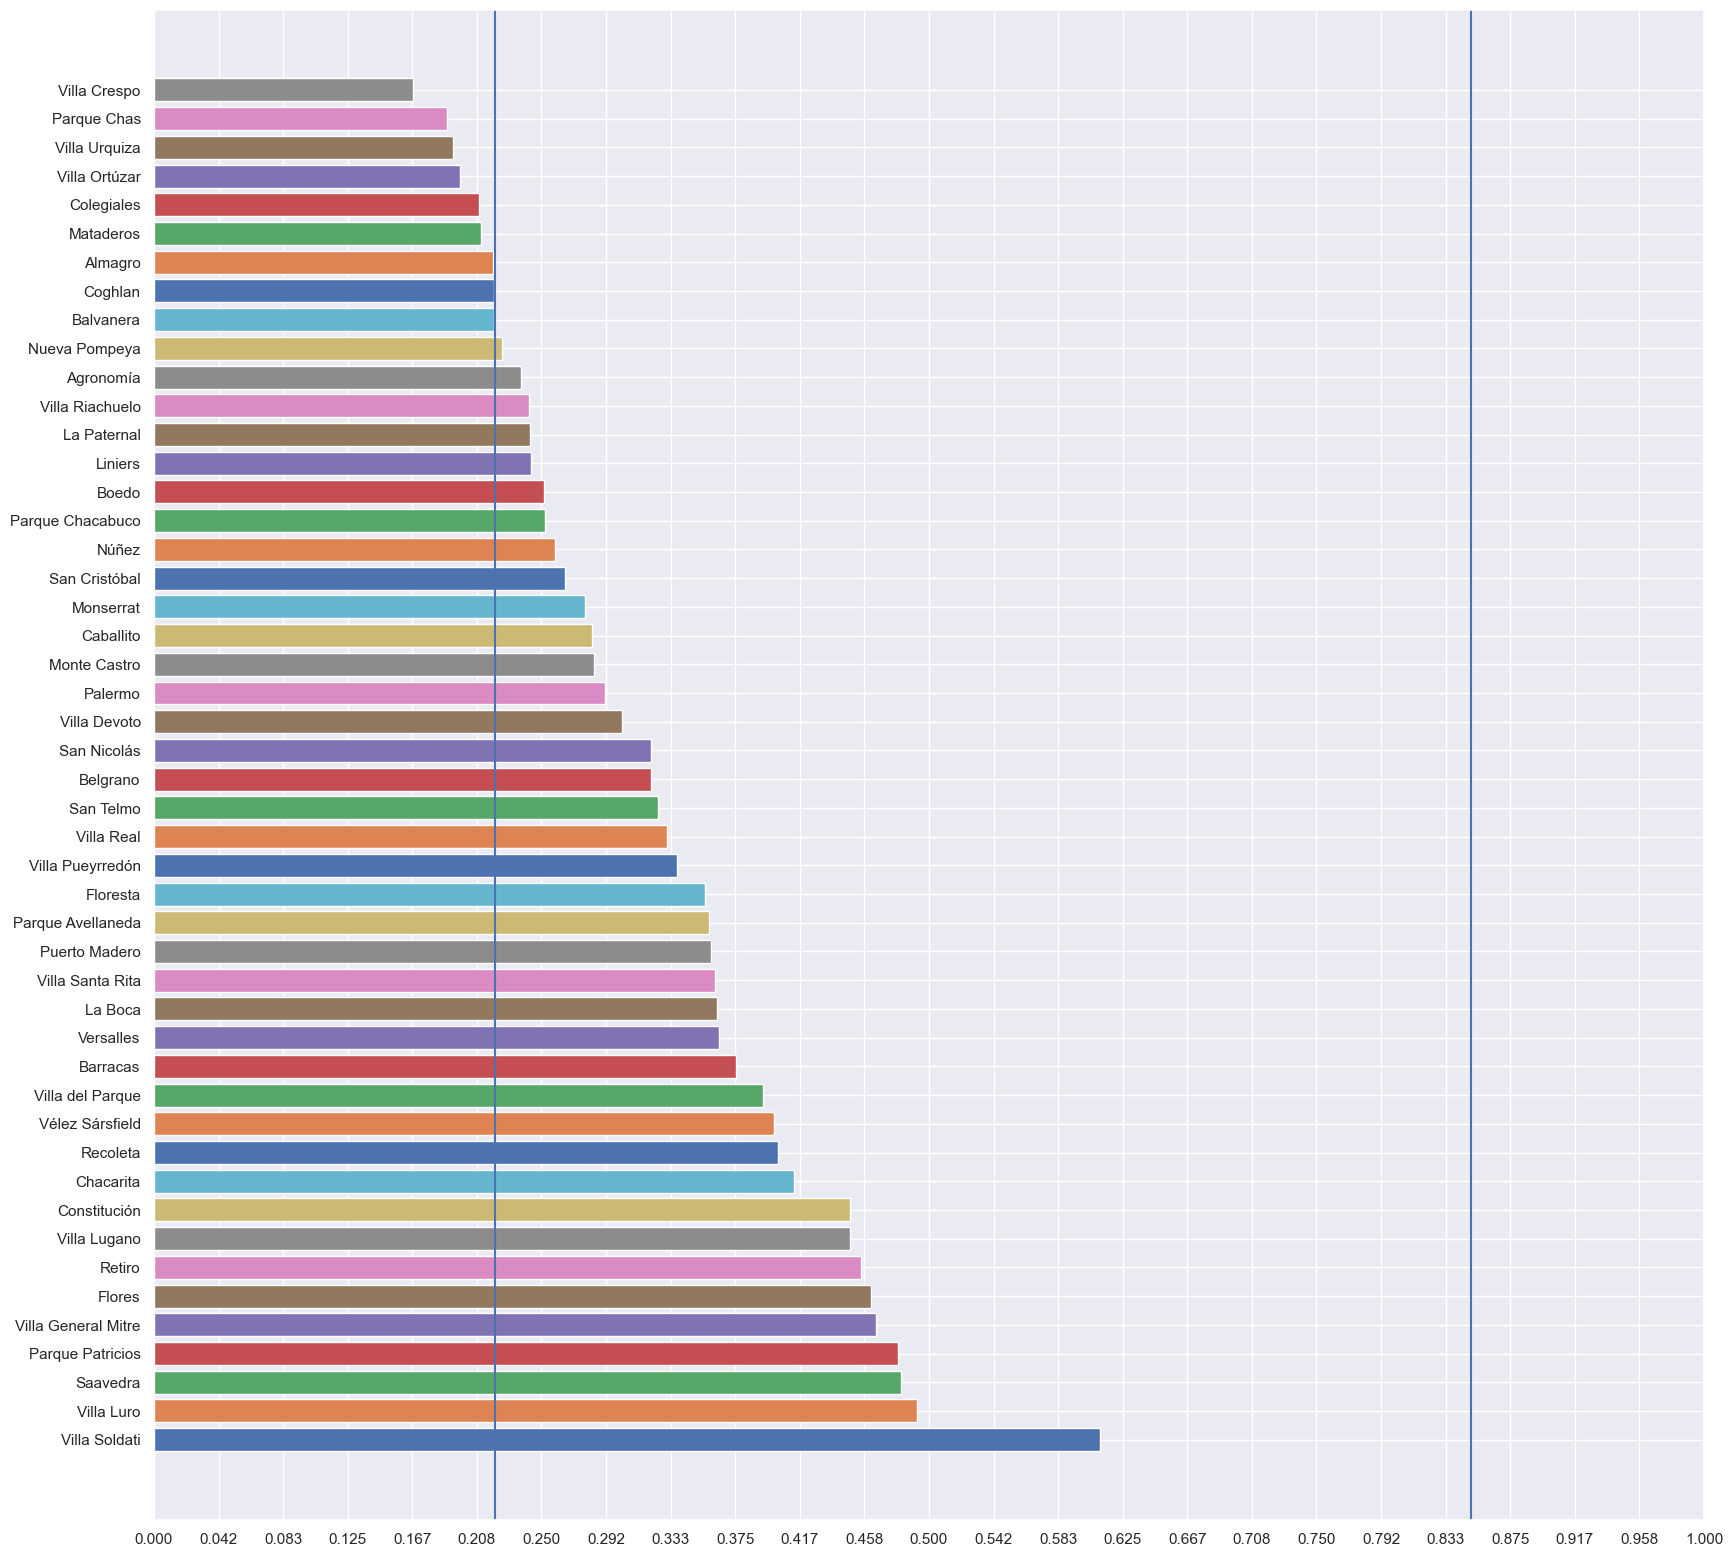

In [645]:
barrios = sorted(df.barrio.unique(), key = lambda barrio: df[df.barrio == barrio][variable_target].value_counts(normalize=True).loc[0])
plt.figure(dpi=100, figsize=(20,20))
for barrio in barrios:
    foo = df[df.barrio == barrio][variable_target].value_counts(normalize=True)
    plt.barh(barrio, foo.loc[1])
plt.axvline(0.22)
plt.axvline(0.85)
plt.xticks(np.linspace(0,1,25))
plt.show()

In [576]:
df[df.barrio == "Belgrano"][variable_target].value_counts(normalize=True)

0.0    0.863195
1.0    0.136805
Name: llovieron_hamburguesas_al_dia_siguiente, dtype: float64

<Figure size 600x400 with 0 Axes>

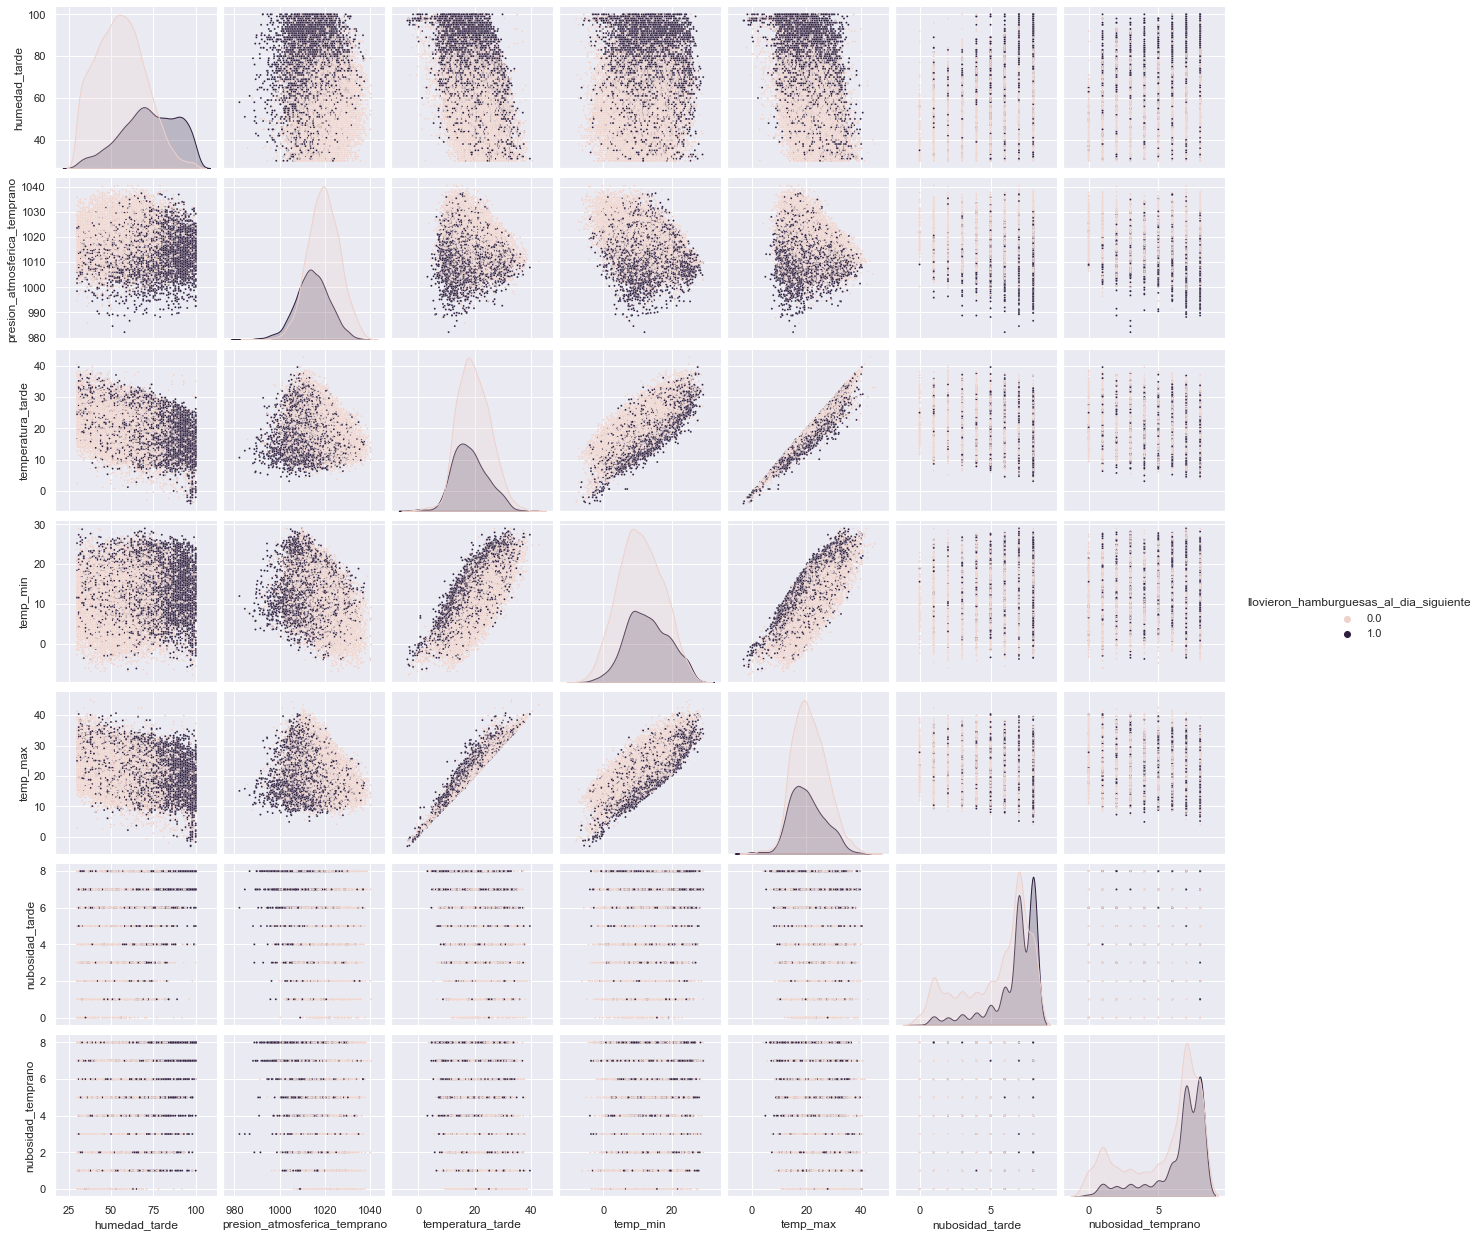

In [648]:
plt.figure(dpi=100)
sns.pairplot(
    df[["humedad_tarde",
        "presion_atmosferica_temprano",
        "temperatura_tarde",
        "temp_min",
        "temp_max",
        "nubosidad_tarde",
        "nubosidad_temprano",
        variable_target]].sample(25000, random_state=0),
    hue=variable_target,
    plot_kws={"s": 4}
)